In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
# Load the dataset
file_path = "etoba.csv"
# Reload the dataset to start fresh
df = pd.read_csv(file_path, encoding="latin1")

# Check for missing values and data types
df.info()

# Display a few rows to examine the data format
df.head()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Columns: 135 entries, A2:GROUP to J7.5
dtypes: float64(20), int64(17), object(98)
memory usage: 1.4+ MB


,A2:GROUP,B3:AGE,B5:SEX,B6:M-STATUS,B7:EDUCATION,B8:Household Size,C1:TOT_INCOME/A,C2:INCOME/B/FISH,C4:INCOME/B/ALT,D1.1:A_BIKE,...,J6.2,J6.3,J6.4,J6.5,J6.6,J7.1,J7.2,J7.3,J7.4,J7.5
0,BENEFICIARY,33,Male,Married,High School,4-6 members,10K,10K,10K,Wala,...,4.0,5.0,5.0,5.0,5.0,3.0,3.0,5.0,5.0,5.0
1,BENEFICIARY,57,Male,Livedin,High School,4-6 members,10K,10K,10K,Wala,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
2,BENEFICIARY,45,Male,Married,High School,4-6 members,10K,10K,10K,Wala,...,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,BENEFICIARY,32,Male,Single,High School,7-9 members,10K,10K,10K,Wala,...,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
4,BENEFICIARY,38,Male,Single,High School,1-3 members,10K,10K,10K,Wala,...,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0


In [94]:
# Apply Label Encoding to all categorical columns
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for reference

# Save the transformed dataset
encoded_file_path = "D:/Downloads/ojt/etoba_encoded.csv"
df.to_csv(encoded_file_path, index=False)

# Show a preview of the transformed data
print(df.head())


   A2:GROUP  B3:AGE  B5:SEX  B6:M-STATUS  B7:EDUCATION  B8:Household Size  \
0         0      33       1            1             2                  3   
1         0      57       1            0             2                  3   
2         0      45       1            1             2                  3   
3         0      32       1            2             2                  4   
4         0      38       1            2             2                  1   

   C1:TOT_INCOME/A  C2:INCOME/B/FISH  C4:INCOME/B/ALT  D1.1:A_BIKE  ...  J6.2  \
0                1                 2                1            1  ...   4.0   
1                1                 2                1            1  ...   5.0   
2                1                 2                1            1  ...   5.0   
3                1                 2                1            1  ...   1.0   
4                1                 2                1            1  ...   5.0   

   J6.3  J6.4  J6.5  J6.6  J7.1  J7.2  J7.3  J7.4 

In [ ]:
# Load the dataset
file_path = "D:/Downloads/ojt/etoba_encoded.csv"  # Make sure to use the encoded dataset
df = pd.read_csv(file_path)

# Drop features (columns) with more than 50% missing values
threshold = 0.5 * len(df)  # 50% of the total rows
df = df.dropna(thresh=threshold, axis=1)

# Replace remaining missing values with the mean of their respective column
df = df.fillna(df.mean())

# Save the cleaned dataset
cleaned_file_path = "D:/Downloads/ojt/etoba_cleaned.csv"
df.to_csv(cleaned_file_path, index=False)

# Show a preview of the transformed data
print(df.head())


   A2:GROUP  B3:AGE  B5:SEX  B6:M-STATUS  B7:EDUCATION  B8:Household Size  \
0         0      33       1            1             2                  3   
1         0      57       1            0             2                  3   
2         0      45       1            1             2                  3   
3         0      32       1            2             2                  4   
4         0      38       1            2             2                  1   

   C1:TOT_INCOME/A  C2:INCOME/B/FISH  C4:INCOME/B/ALT  D1.1:A_BIKE  ...  \
0                1                 2                1            1  ...   
1                1                 2                1            1  ...   
2                1                 2                1            1  ...   
3                1                 2                1            1  ...   
4                1                 2                1            1  ...   

   I8.2:FISH_R  I8.3:BOAT_P  I8.4:FISH_COMP  I8.5:OTHERS  NY_W/BOAT  \
0            0 

In [ ]:
# Select only numerical columns for correlation analysis
df_numeric = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Display the top correlated features (absolute values sorted)
correlation_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates().head(20)



C:\Users\Admin\AppData\Local\Temp\ipykernel_7748\3026940439.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ~correlation_matrix.applymap(lambda x: x == 1)  # Ignore diagonal


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [78]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Step 1: Drop one feature from highly correlated pairs (Threshold: 0.9)
# Identify pairs with high correlation
corr_threshold = 0.9
upper_triangle = correlation_matrix.where(
    ~correlation_matrix.applymap(lambda x: x == 1)  # Ignore diagonal
).abs().where(lambda x: x > corr_threshold)

# Drop one feature from each highly correlated pair
features_to_drop = set()
for col in upper_triangle.columns:
    highly_corr_features = upper_triangle[col].dropna().index.tolist()
    if highly_corr_features:
        features_to_drop.add(col)

# Drop selected features
df_selected = df_numeric.drop(columns=features_to_drop)

# Step 2: Encode categorical features
df_categorical = df_cleaned.select_dtypes(include=['object'])
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_categorical = encoder.fit_transform(df_categorical)
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(df_categorical.columns))

# Step 3: Normalize numeric features
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(df_selected)
scaled_df = pd.DataFrame(scaled_numeric, columns=df_selected.columns)

# Step 4: Merge processed numerical and encoded categorical features
df_final = pd.concat([scaled_df, encoded_df], axis=1)

# Display the final dataset info
df_final.info(), df_final.head()


C:\Users\Admin\AppData\Local\Temp\ipykernel_7748\1515991593.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ~correlation_matrix.applymap(lambda x: x == 1)  # Ignore diagonal


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Columns: 185 entries, B3:AGE to I5:TFV_Wala, hindi ako gumagamit ng anumang sasakyang pandagat
dtypes: float64(185)
memory usage: 1.9 MB


(None,
      B3:AGE    I3:???   I6.1:GN   I6.2:FT  I6.3:PPN  I6.4:H&L  I6.5:OTHERS  \
 0 -1.210211  0.870252 -1.058213 -0.347908 -0.351822 -1.251022    -0.362143   
 1  0.675211 -0.907613 -1.058213 -0.347908 -0.351822 -1.251022     2.761340   
 2 -0.267500 -0.018680 -1.058213 -0.347908 -0.351822  0.799347    -0.362143   
 3 -1.288770 -0.907613 -1.058213 -0.347908 -0.351822 -1.251022    -0.362143   
 4 -0.817415 -0.907613  0.944989 -0.347908 -0.351822 -1.251022     2.761340   
 
    I7.1:LIFE_J  I7.2:LIFE_B  I7.3:F_LIGHT  ...  I2:A/C_M_Oo  \
 0    -0.673916    -0.405656     -2.283904  ...          0.0   
 1    -0.673916     2.465142     -2.283904  ...          0.0   
 2    -0.673916     2.465142     -2.283904  ...          0.0   
 3    -0.673916     2.465142     -2.283904  ...          0.0   
 4    -0.673916     2.465142     -2.283904  ...          0.0   
 
    I2:A/C_M_Oo, tukuyin  \
 0                   1.0   
 1                   0.0   
 2                   1.0   
 3                 

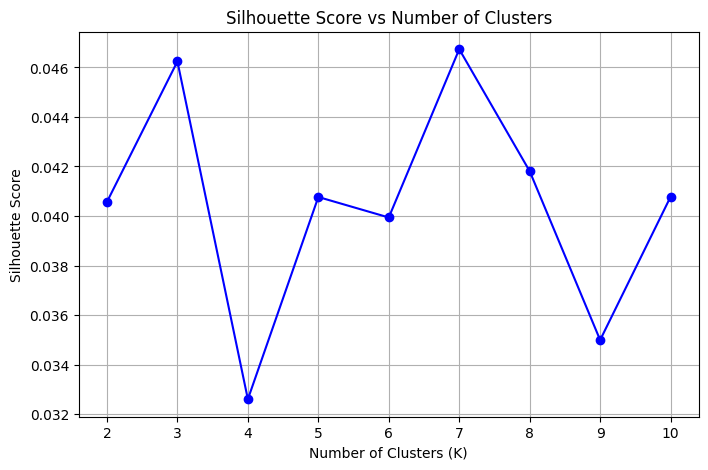

7

In [79]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Determine the optimal number of clusters using the Silhouette Score
silhouette_scores = []
K_range = range(2, 11)  # Testing clusters from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_final)
    silhouette_avg = silhouette_score(df_final, labels)
    silhouette_scores.append(silhouette_avg)

# Step 2: Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.grid(True)
plt.show()

# Return the best number of clusters
best_k = K_range[silhouette_scores.index(max(silhouette_scores))]
best_k

In [80]:
from sklearn.decomposition import PCA

# Step 1: Apply PCA to reduce dimensions while retaining 95% variance
pca = PCA(n_components=0.95)  # Retain 95% of variance
df_pca = pca.fit_transform(df_final)

# Check how many components were kept
df_pca.shape

(1380, 79)

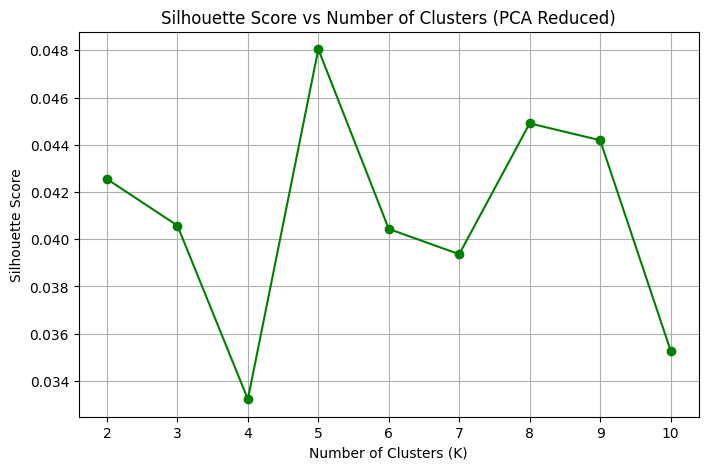

Optimal number of clusters: 5


In [81]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Apply PCA to reduce dimensions while retaining 95% variance
pca = PCA(n_components=0.95)  # Retain 95% of variance
df_pca = pca.fit_transform(df_final)

# Step 2: Re-run K-Means clustering on the reduced dataset
silhouette_scores_pca = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_pca)
    silhouette_avg = silhouette_score(df_pca, labels)
    silhouette_scores_pca.append(silhouette_avg)

# Step 3: Plot Silhouette Scores for PCA-reduced data
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores_pca, marker='o', linestyle='-', color='g')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters (PCA Reduced)")
plt.grid(True)
plt.show()

# Get the best number of clusters
best_k_pca = K_range[silhouette_scores_pca.index(max(silhouette_scores_pca))]
print(f"Optimal number of clusters: {best_k_pca}")


           B3:AGE    I3:???   I6.1:GN   I6.2:FT  I6.3:PPN  I6.4:H&L  \
Cluster                                                               
0        0.182406  0.193693  0.281813  0.333930  0.443996  0.365480   
1        0.064866  0.092141  0.466771 -0.065856 -0.123061 -1.207513   
2       -0.145083 -0.088859 -0.429389 -0.099578 -0.219732  0.780076   
3       -0.004018 -0.248405 -0.169152 -0.112576  0.186522 -0.375584   

         I6.5:OTHERS  I7.1:LIFE_J  I7.2:LIFE_B  I7.3:F_LIGHT  ...  \
Cluster                                                       ...   
0          -0.074313     0.445479     0.632926      0.242773  ...   
1           0.275810    -0.301884    -0.207670      0.091311  ...   
2          -0.274075     0.068329    -0.270750      0.049025  ...   
3           0.357311    -0.298122     0.207211     -0.739540  ...   

         I2:A/C_M_Oo  I2:A/C_M_Oo, tukuyin  \
Cluster                                      
0           0.034130              0.638225   
1           0.013263

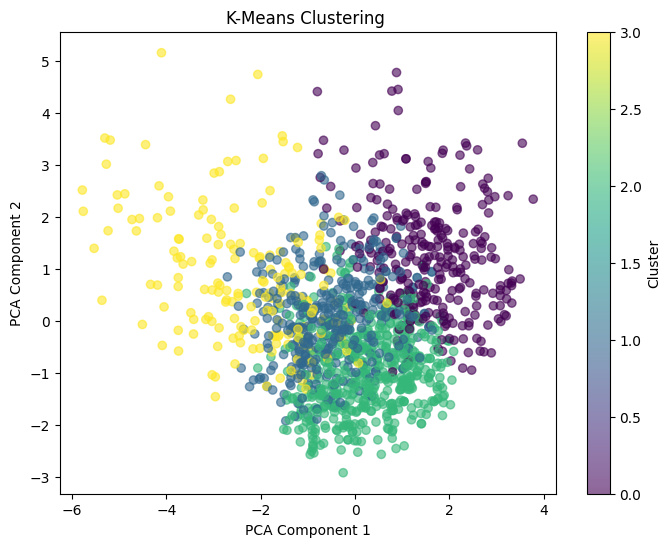

In [89]:
# Step 1: Apply K-Means with the optimal K
kmeans_final = KMeans(n_clusters=4, random_state=42, n_init=10)
df_pca_clusters = kmeans_final.fit_predict(df_pca)

# Step 2: Add cluster labels to the dataset
df_final['Cluster'] = df_pca_clusters

# Step 3: Compute mean values of each cluster
cluster_summary = df_final.groupby('Cluster').mean()
print(cluster_summary)

# Step 4: Visualize Clusters (for 2D PCA)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_pca_clusters, cmap='viridis', alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering ")
plt.colorbar(label="Cluster")
plt.show()
